In [20]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
from matplotlib import cm
import itertools

In [21]:
def g(n,N):
    return (1.0/(N+1))*((N-n+1)*np.cos(np.pi*n/(N+1)) + np.sin(np.pi*n/(N+1))/np.tan(np.pi/(N+1)))
def T(n,x):
    if(n == 0):
        return 1
    if(n == 1):
        return x
    return np.cos(n*np.arccos(x))

In [131]:
for i,f in enumerate(os.listdir("../.results/chebyshev/")):
    if i == 0:
        df = pd.read_csv('../.results/chebyshev/'+f)
    else:
        df = pd.concat([df,pd.read_csv('../.results/chebyshev/'+f)])

[0.5]


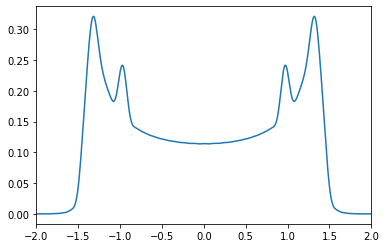

In [160]:
dfc = df.loc[(df['thermal'] == 1) & (df['N']==50) & (df['Model']=='XX') & (df['MaxDim'] == 100) & (df['nChebyshev']==1700) & (df['W']>30)]
N = int(dfc.nChebyshev.unique())
qs = dfc.qFactor.unique()
print(qs)
W = float(dfc.W.unique())
Wp = 0.9875
a = W/(2*Wp)
omegas = np.linspace(-2,2,401)
s = []
for q in qs:
    mom = list((dfc.loc[dfc['qFactor']==q]).moment)
    wp = (omegas+W/2)/a - Wp
    coeff = ((2.0*Wp)/W)/(np.pi*np.sqrt(1-wp**2))
    res = g(0,N)*mom[0]
    for i in range(1,N):
        res += 2*g(i,N)*mom[i]*T(i,wp)
    s.append(coeff*res)
moms = list(dfc.moment)
plt.xlim(-2,2)
plt.plot(omegas,s[-1])
plt.savefig('XX-L50.pdf',format='pdf')
dfout = pd.DataFrame()
for q,sqw in zip(list(qs),s):
    predf = {'omega' : omegas, 'S' : sqw}
    dftemp = pd.DataFrame(predf)
    dftemp['qFactor'] = q
    dfout = pd.concat([dfout,dftemp])
#dfout.to_csv('S/Heisenberg_50_Chebyshev')

stuff

This is a comment $\sum_k k$

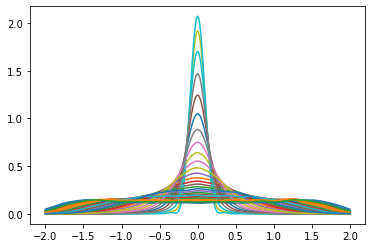

In [156]:
for q,sqw in zip(qs,s):
    plt.plot(omegas,sqw,label=str(q))

In [ ]:
for i,f in enumerate(os.listdir("../.results/broadening/")):
    if i == 0:
        df = pd.read_csv('../.results/broadening/'+f)
    else:
        df = pd.concat([df,pd.read_csv('../.results/broadening/'+f)])

In [5]:
dft = df.loc[(df['eta'] == 0.1) & (df['thermal'] == 1) & (df['N']==50) & (df['Model']=='XX') & (df['MaxDim'] == 50) & (df['nChebysev']==100)]

In [153]:
dft = pd.read_csv('S/Heisenberg_50_Chebyshev')
qs = dft.qFactor.unique()
omegas = dft.omega.unique()
dft['phis'] = dft.omega/(dft.qFactor**(3.0/2.0))
dft['Sp'] = 0.5*(dft.qFactor**(3.0/2.0))*dft.S
phis = []
#for q in qs:
#    for omega in omegas:
#        phis.append(omega/(q**(3/2)))
#        s.append((q**(3/2))*float(dft.loc[(dft['qFactor']==q) & (dft['omega']==omega)].S))

[1.96752634e-08 1.63470552e-08 1.38173893e-08 ... 1.00876912e-08
 1.26323818e-08 1.60564743e-08]


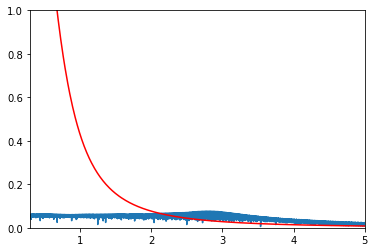

In [154]:
phis = np.array(dft.phis)
s = np.array(dft.Sp)
inds = np.argsort(phis)
phis = phis[inds]
s = s[inds]
plt.plot(phis,s)
print(s)
phis = np.sort(phis)
f = open('phis.txt','w')
for p in phis:
    f.write(str(p)+'\n')
f.close()
#print(len(phis))
# q = np.max(qs)
kpz = pd.read_csv('../scripts/Mathematica/kpz.txt')
plt.plot(kpz.omega,kpz.fdot,color='r')
plt.ylim(0,1)
plt.xlim(0.3,5)
plt.show()
#for q in qs:
#    res = dft.loc[dft['qFactor'] == q]
#    plt.plot(res.omega,res.S,label=str(q))
#plt.legend()
#plt.xlim(0,2)
#plt.show()

In [6]:
dfw = pd.read_csv('../.results/weights/30_thermalChain_XX_SpinHalf_1_300_0_0.500000_500_SpectralWeights')

FileNotFoundError: [Errno 2] File b'../.results/weights/30_thermalChain_XX_SpinHalf_1_300_0_0.500000_500_SpectralWeights' does not exist: b'../.results/weights/30_thermalChain_XX_SpinHalf_1_300_0_0.500000_500_SpectralWeights'

In [81]:
dfwt = dfw.loc[(dfw['thermal'] == 1) & (dfw['N']==50) & (dfw['Model']=='XX') & (dfw['MaxDim'] == 200) & (dfw['qFactor'] == 0.5)]

In [82]:
weightsCut = 0.0001
residueCut = 0.5
weights = []
residuals = []
frequencies = []
for i in range(1,21):
    weights.append(list(dfwt['weights'+str(i)]))
    residuals.append(list(dfwt['residues'+str(i)]))
    frequencies.append(list(dfwt['frequencies'+str(i)]))
iterations = list(dfwt['iterations'])
omegas = frequencies
print(weights)

[[1.0, 0.5, 4.38732e-05, 1.77579e-07, 1.27419e-06, 1.27419e-06, 1.27419e-06, 1.27419e-06, 1.90905e-19, 1.92889e-19, 1.2704400000000002e-09, 1.6651e-07, 1.21737e-08, 2.2919299999999998e-08, 5.668999999999999e-09, 3.34808e-08, 2.16805e-08, 2.1251900000000005e-08, 1.98902e-08, 2.13972e-08], [nan, 0.5, 0.9999120000000001, 0.5, 0.0008237110000000001, 0.0008237110000000001, 7.203630000000001e-18, 7.19117e-18, 1.27419e-06, 1.27419e-06, 3.12035e-07, 2.5047499999999997e-07, 6.417050000000001e-07, 7.009879999999999e-07, 8.01817e-07, 1.1744000000000001e-07, 1.5861e-07, 1.83809e-07, 1.8895600000000001e-07, 2.24535e-07], [nan, nan, 4.38732e-05, 0.5, 0.99835, 0.499175, 0.0008237110000000001, 0.0008237110000000001, 5.455369999999999e-18, 1.76377e-17, 5.57163e-05, 4.01374e-05, 6.58708e-07, 6.12353e-07, 3.9879899999999997e-07, 7.752809999999999e-07, 7.729919999999999e-07, 7.84748e-07, 7.88515e-07, 8.1375e-07], [nan, nan, nan, 1.77579e-07, 0.0008237110000000001, 0.499175, 0.99835, 0.499175, 0.0008237110

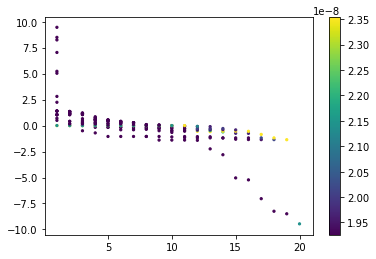

In [83]:
for i, os, ws, rs in zip(iterations, omegas, weights, residuals):
    xs = np.array([i for x in range(len(os))])
    ys = np.array(os)
    zs = np.array(ws)
    #inds = np.where(zs > 1e-2)
    # inds = np.array([i for i in range(len(os))])
    plt.scatter(xs, ys, c=zs, s=5)
    # plt.scatter(xs[inds], ys[inds], c=zs[inds], s=5, cmap=cm.cool)
    # for o, w, r in zip(os, ws, rs):
    #     plt.scatter(i, o, s=1)
plt.colorbar()
plt.show()

In [58]:
print(omegas[0])
print(weights[0])

[6.63012e-13, 0.00662397, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0]
[1.0, 0.5, 2.19385e-05, 2.19385e-05, 2.19385e-05, 2.1930700000000003e-05, 2.1930700000000003e-05, 2.1930700000000003e-05, 2.1930700000000003e-05, 2.1930700000000003e-05, 2.19306e-05, 2.19306e-05, 2.19306e-05, 2.19306e-05, 2.19306e-05, 2.19306e-05, 2.19306e-05, 2.19306e-05, 2.19306e-05, 2.19306e-05]
